# Facial Recognition Datasets Exploration



Exploring the datasets available on the internet of faces to train the Siamese Convolutional Neural Network.

As I am looking to build a Facial Recognition model, it would be best to check out the available datasets. Observing some sample images might give a better understanding on the learning of the model, for example, if all the photos in the training datasets have a certain kind of lighting, it might be prudent to maybe look for more images of a different form of lighting to help the eventual model generalise better, in the case inference is run on a differently lit photo. Image resolution and aspect ratio might also play a part.

## 1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## 2. Dataset 1: Labelled Faces in The Wild

The first dataset to be explored is Labelled Faces in The Wild (LFW). LFW is a database of face photographs designed for studying the problem of unconstrained face recognition. This database was created and maintained by researchers at the University of Massachusetts, Amherst. 13,233 images of 5,749 people were detected and centered by the Viola Jones face detector and collected from the web. 1,680 of the people pictured have two or more distinct photos in the dataset

#### a) Viewing Some Images

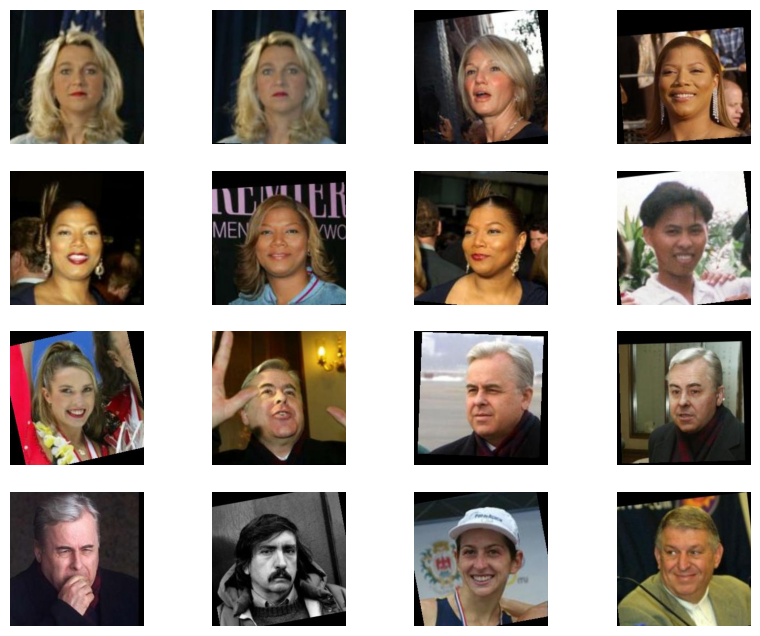

In [3]:
def show_image_samples(dir_path, nrows, ncols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    
    img_paths = []
    imgs = []
    for root, _, files in os.walk(dir_path):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg')):
                img_paths.append(os.path.join(root, file))
    
    for i, img_path in enumerate(img_paths):
        if i >= nrows * ncols:
            break
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        try:
            img = plt.imread(img_path)
            imgs.append(img)
            plt.imshow(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    plt.show()
    return imgs

imgs = show_image_samples('../data/lfw-deepfunneled/', 4, 4)

Right away, it looks like the images are great for our usecase. The images have been cropped to just a face, and even rotated such that the faces are orientated in a similar fashion.

#### b) Checking Image Sizes (Resolution)

Checking the sizes of the images in the dataset is a good place to start as well, since that would determine the sizes of the input matrices and therefore the architecture of the Neural Network we'll be sending the data into.

In [4]:
for img in imgs:
    print(img.shape)

(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)


The 12 sample images we have outputted in the cells before all have the same resolution, 250 x 250 pixels, and with 3 channels. This is great news, as this minimises the amount of data preprocessing in terms of resizing images or having to deal with an uneven number of channels (RGB vs Grayscale).

Interestingly, it seems that even the black and white photos (second from the left of the most bottom row) has 3 channels. It's possible that the curators of this dataset have already done preprocessing for us.

## Dataset 2: Face Images with Marked Landmark Points

This dataset is a kaggle dataset of 7049 facial images, along with a .csv file with facial keypoints marked on them. The images are contained within a numpy compressed array .npz format, so it will require different ways to read and show the images

In [36]:
data = np.load('/home/danny/siamese-nn-facial-recognition/data/face_images.npz')
data = data.get(data.files[0])
data = np.moveaxis(data, -1, 0)
data = data.reshape(data.shape[0], data.shape[1], data.shape[1], 1)

<frozen _collections_abc>:774: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.


Upon further research, it seems like this dataset has its images in grayscale, therefore as seen above, the final dimension of the reshape method was set to 1 as there is only 1 color channel.

As a result, the array `data` is an array of [images, width of images, height of images, channel].

The next step would be to observe some sample images see what the resolution of each image is as well.

#### a) Viewing Some Images

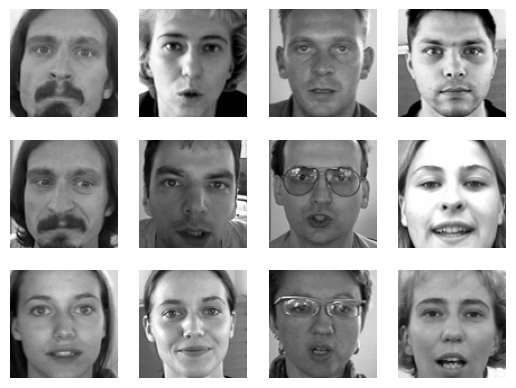

In [46]:
dataset2_imgs = []
for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = data[i, :, :, 0]
    plt.imshow(img, cmap='gray')
    dataset2_imgs.append(img)
    plt.axis('off')

Checking out these images, they are satisfactory, however, as compared to the LFW dataset, each image is a lot more zoomed in on the subjects' faces. Here are some points of comparison:
1. As this dataset was designed for facial landmark identification / recognition, it does make sense that the images would be more zoomed in. 
2. Another difference is that the images in this dataset are in grayscale, while the LFW dataset has its images in RGB. While a single channel would reduce the computational complexity in training the Neural Network downstream, the usecase we are thinking of implementing is a facial recognition model, which would benefit from the most amount of information we can provide it, which would mean an RGB image might be the better choice.

#### Checking Image Sizes (Resolution)

In [47]:
for img in dataset2_imgs:
    print(img.shape)

(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)


The images in this dataset are much smaller at `(96 x 96)` compared to the `(250 x 250)` from LFW. Similar to the grayscale vs RGB point, this would decrease compuational complexity, but at the risk of losing information the model could use to better perform a facial recognition task.